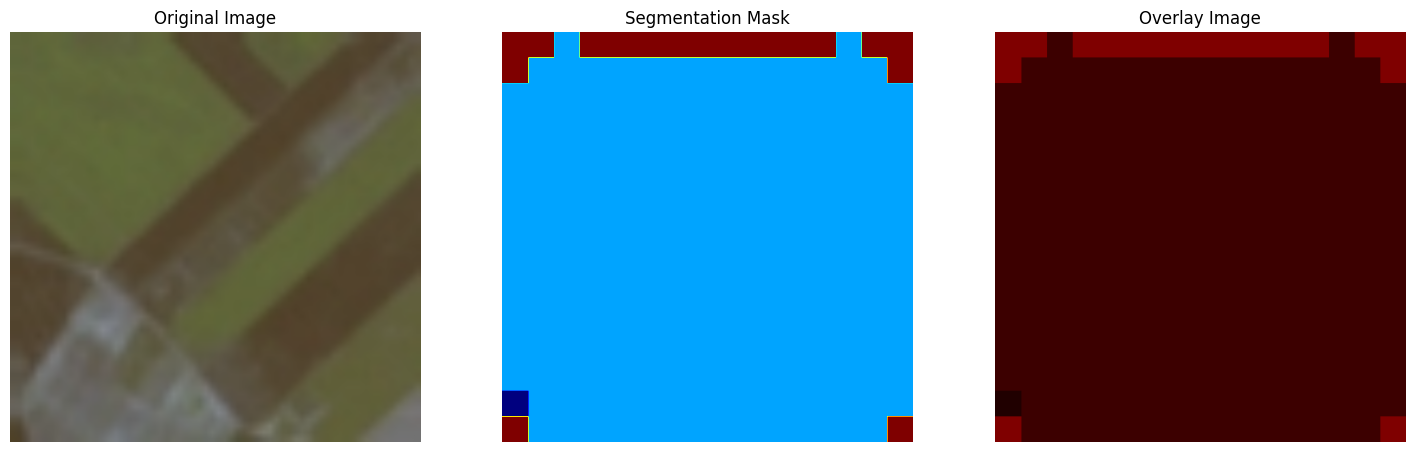

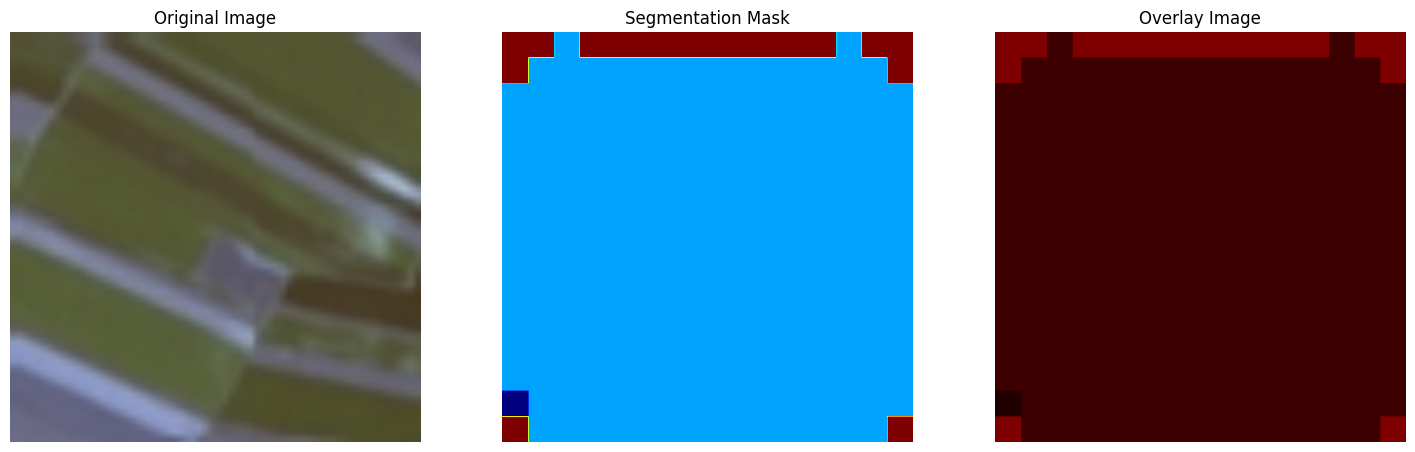

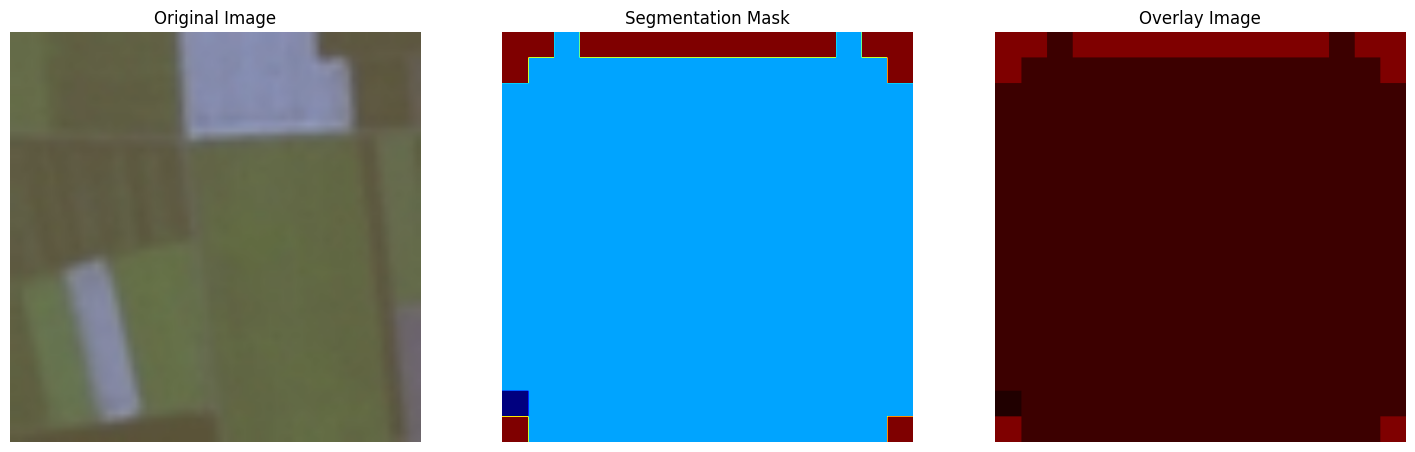

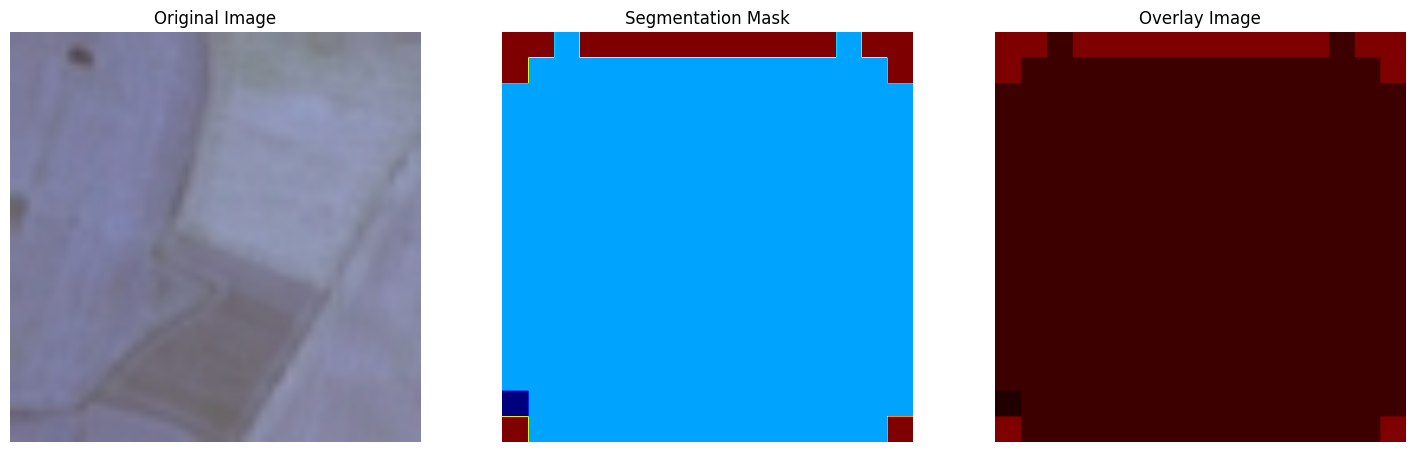

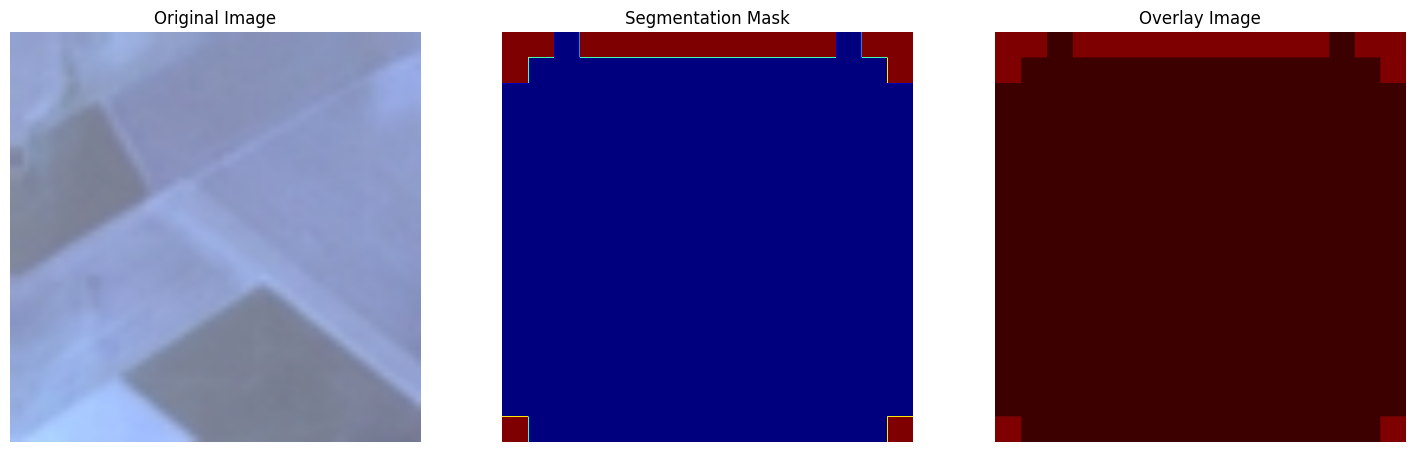

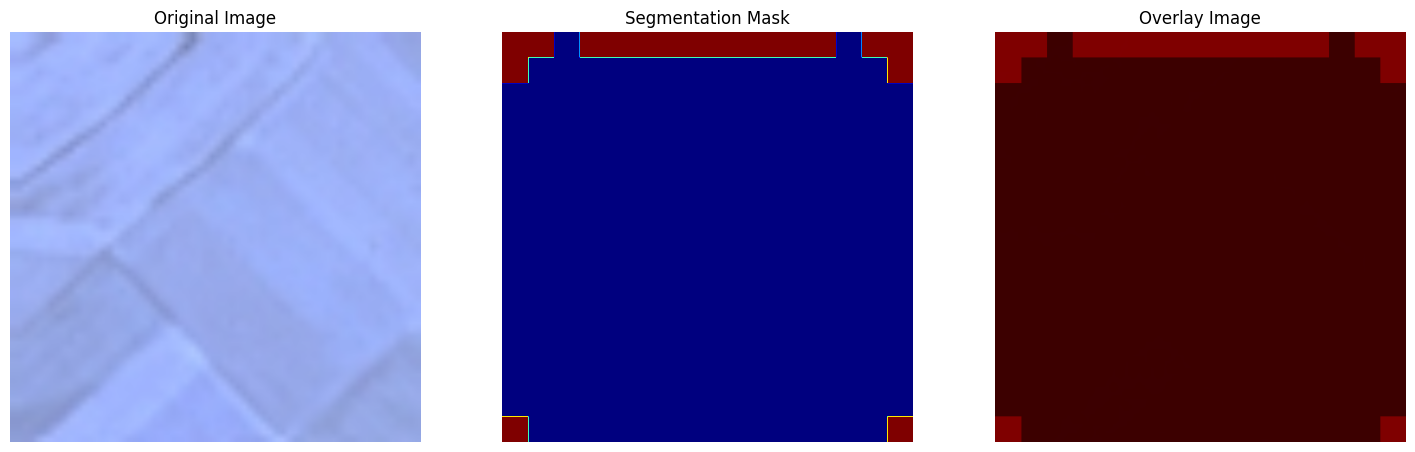

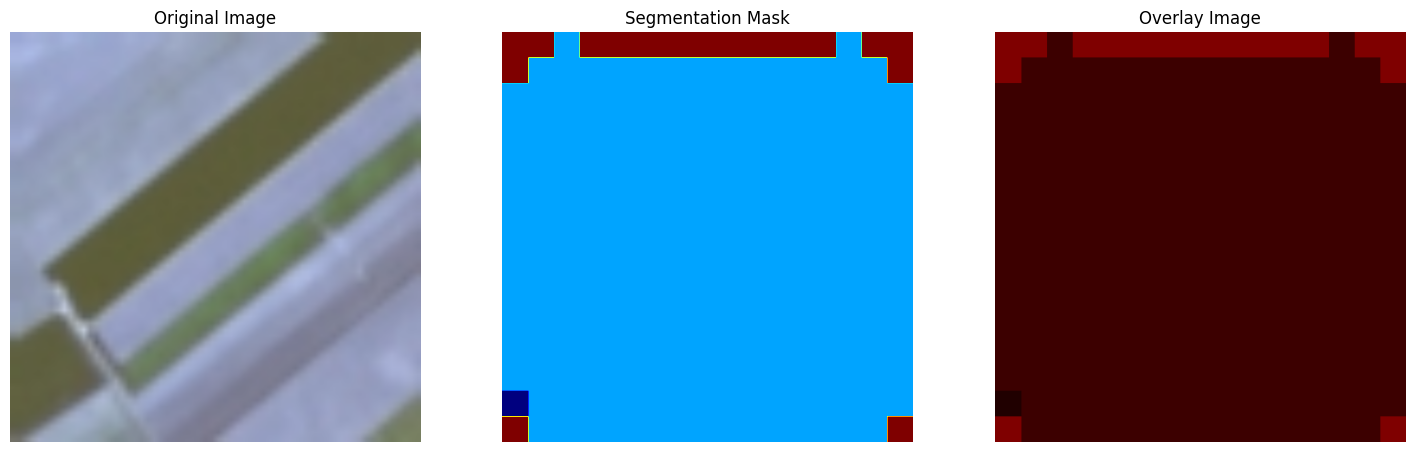

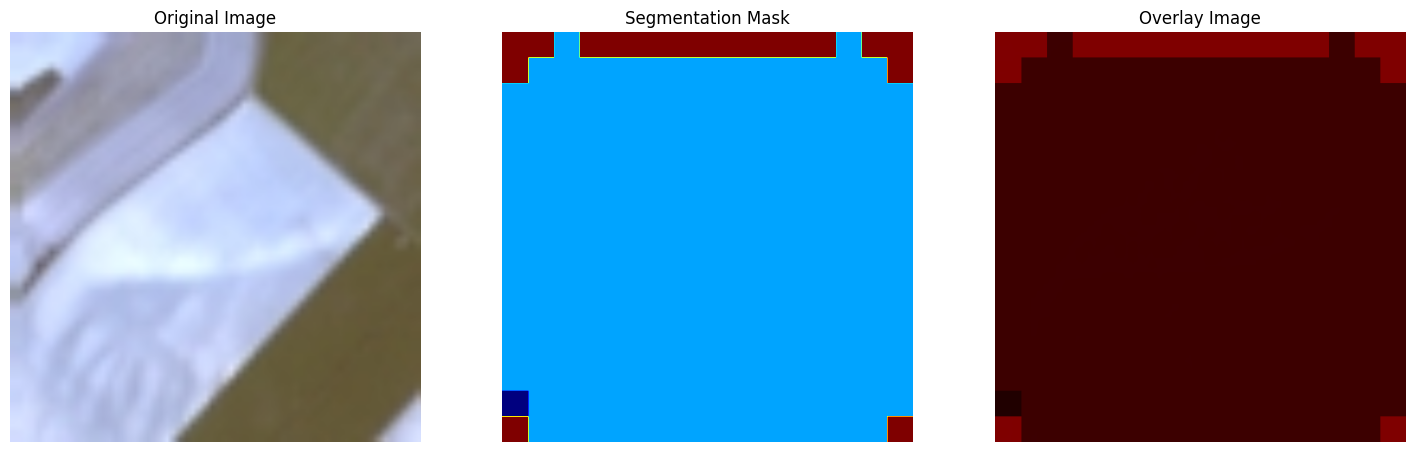

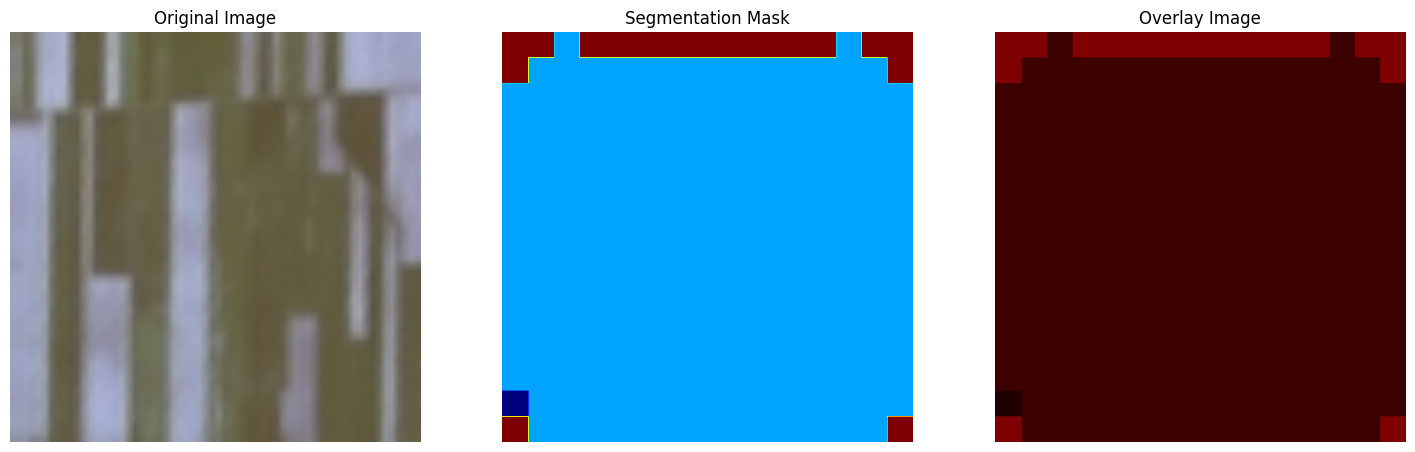

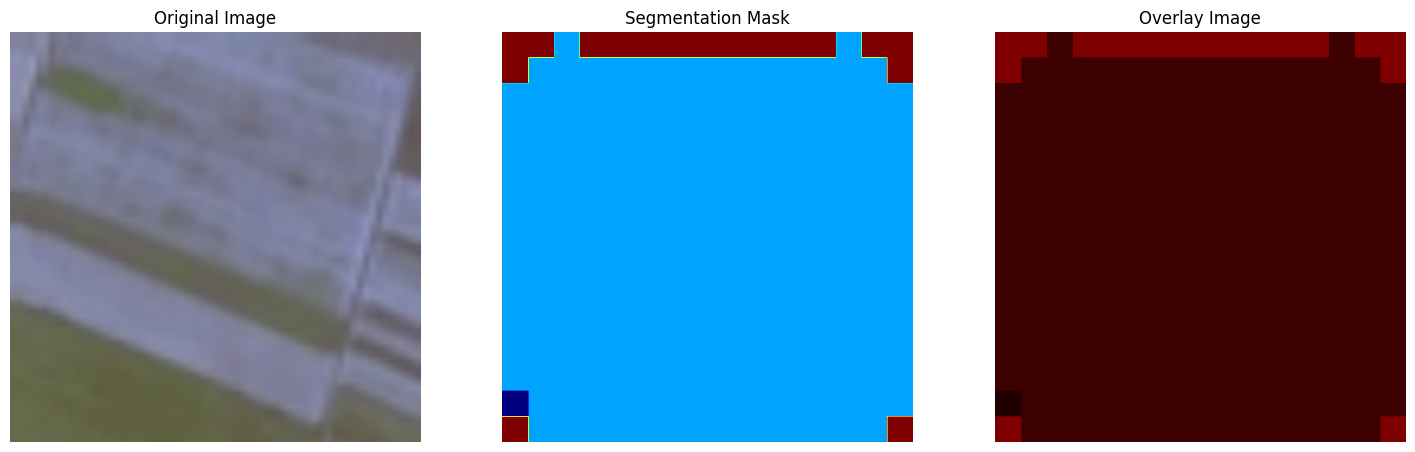

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Ensure OpenCV is installed: pip install opencv-python

# Paths
category = "AnnualCrop"  # Change category as needed
preprocessed_outdir = "../data/preprocessed_output_data"
output_masks_dir = f"../data/segmentation_masks_test/{category}"

# Load a few images and their corresponding masks
num_test_images = 10
image_path = os.path.join(preprocessed_outdir, f"{category}_train.npy")
images = np.load(image_path)

for i in range(num_test_images):
    # Original image
    original_image = images[i]

    # Segmentation mask
    mask_path = os.path.join(output_masks_dir, f"mask_test_{i}.npy")
    segmentation_mask = np.load(mask_path)

    # Resize segmentation mask to match the original image dimensions
    segmentation_mask_resized = cv2.resize(segmentation_mask, 
                                           (original_image.shape[1], original_image.shape[0]), 
                                           interpolation=cv2.INTER_NEAREST)

    # Normalize segmentation mask to [0, 1] for transparency
    segmentation_mask_normalized = segmentation_mask_resized / segmentation_mask_resized.max()

    # Overlay segmentation mask on the original image
    overlay_image = original_image.copy()
    overlay_image[..., 0] = overlay_image[..., 0] * 0.5 + segmentation_mask_normalized * 255 * 0.5

    # Visualize
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(segmentation_mask_resized, cmap="jet")
    plt.title("Segmentation Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlay_image.astype(np.uint8))
    plt.title("Overlay Image")
    plt.axis("off")

    plt.show()
